Module 4 Case study 4

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the data - BigMartSalesData.csv

df = pd.read_csv('1937_m4_datasets_v1_5fa_ae16cor/BigMartSalesData.csv')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  Amount InvoiceDate  Day  Month  Year  CustomerID         Country  
0       2.55   15.30    01-12-10    1     12  2010     17850.0  United Kingdom  
1       3.39   20.34    01-12-10    1     12  2010     17850.0  United Kingdom  
2       2.75   22.00    01-12-10    1     12  2010     17850.0  United Kingdom  
3       3.39   20.34    01-12-10    1     12  2010     17850.0  United Kingdom  
4       3.39   20.34    01-12-10    1     12  2010     17850.0  United Kingdom  


In [4]:
print(df.shape)
print(df.info())       # CustomerID - float type 

(541874, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541874 entries, 0 to 541873
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541874 non-null  object 
 1   StockCode    541874 non-null  object 
 2   Description  540422 non-null  object 
 3   Quantity     541874 non-null  int64  
 4   UnitPrice    541874 non-null  float64
 5   Amount       541874 non-null  float64
 6   InvoiceDate  541874 non-null  object 
 7   Day          541874 non-null  int64  
 8   Month        541874 non-null  int64  
 9   Year         541874 non-null  int64  
 10  CustomerID   406829 non-null  float64
 11  Country      541874 non-null  object 
dtypes: float64(3), int64(4), object(5)
memory usage: 49.6+ MB
None


In [5]:
# Changing customer ID to int data type

# print(df['CustomerID'].dtypes)
# df['CustomerID'] = df['CustomerID'].astype(int64)
# print(df['CustomerID'].dtypes)

In [6]:
df.describe()

,Quantity,UnitPrice,Amount,Day,Month,Year,CustomerID
count,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,541874.000000,406829.000000
mean,11.341028,4.610038,21.297578,15.022902,7.553228,2010.921607,15287.690570
std,218.002505,96.762800,378.651364,8.663960,3.509063,0.268789,1713.600303
min,1.000000,-11062.060000,-11062.060000,1.000000,1.000000,2010.000000,12346.000000
25%,1.000000,1.250000,3.750000,7.000000,5.000000,2011.000000,13953.000000
50%,3.000000,2.080000,9.900000,15.000000,8.000000,2011.000000,15152.000000
75%,10.000000,4.130000,17.700000,22.000000,11.000000,2011.000000,16791.000000
max,80995.000000,38970.000000,168469.600000,31.000000,12.000000,2011.000000,18287.000000


In [7]:
df.isnull().sum()       # Description and CustomerID have blank data

InvoiceNo           0
StockCode           0
Description      1452
Quantity            0
UnitPrice           0
Amount              0
InvoiceDate         0
Day                 0
Month               0
Year                0
CustomerID     135045
Country             0
dtype: int64

In [8]:
# Few records are duplicates which should be dropped

df.duplicated().sum()

np.int64(5269)

In [9]:
# View duplicate entries

df[df.duplicated() == True]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Amount,InvoiceDate,Day,Month,Year,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,1.25,1.25,01-12-10,1,12,2010,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2.10,2.10,01-12-10,1,12,2010,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2.95,2.95,01-12-10,1,12,2010,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,4.95,4.95,01-12-10,1,12,2010,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2.95,2.95,01-12-10,1,12,2010,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541640,581538,22068,BLACK PIRATE TREASURE CHEST,1,0.39,0.39,09-12-11,9,12,2011,14446.0,United Kingdom
541654,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2.49,2.49,09-12-11,9,12,2011,14446.0,United Kingdom
541657,581538,22992,REVOLVER WOODEN RULER,1,1.95,1.95,09-12-11,9,12,2011,14446.0,United Kingdom
541664,581538,22694,WICKER STAR,1,2.10,2.10,09-12-11,9,12,2011,14446.0,United Kingdom


In [10]:
# Total sales by month in 2011, month with lowest sales?

print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

   UnitPrice  Amount InvoiceDate  Day  Month  Year  CustomerID         Country  
0       2.55   15.30    01-12-10    1     12  2010     17850.0  United Kingdom  
1       3.39   20.34    01-12-10    1     12  2010     17850.0  United Kingdom  
2       2.75   22.00    01-12-10    1     12  2010     17850.0  United Kingdom  
3       3.39   20.34    01-12-10    1     12  2010     17850.0  United Kingdom  
4       3.39   20.34    01-12-10    1     12  2010     17850.0  United Kingdom  


In [11]:
print(df['Year'].value_counts())
df2 = df.copy()
df2 = df2[df2['Year'] == 2011]
print(df2)

Year
2011    499395
2010     42479
Name: count, dtype: int64
       InvoiceNo StockCode                      Description  Quantity  \
42479     539993     22386          JUMBO BAG PINK POLKADOT        10   
42480     539993     21499               BLUE POLKADOT WRAP        25   
42481     539993     21498              RED RETROSPOT WRAP         25   
42482     539993     22379         RECYCLING BAG RETROSPOT          5   
42483     539993     20718        RED RETROSPOT SHOPPER BAG        10   
...          ...       ...                              ...       ...   
541869    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541870    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541871    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541872    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541873    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

        UnitPrice  Amount InvoiceDate  Day  Month  Year  Custo

In [12]:
df2['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

Month
1      822669.640
2      549134.460
3      752003.310
4      582318.451
5      817655.200
6      832231.670
7      757108.941
8      791173.020
9     1097467.722
10    1239237.260
11    1557236.410
12     843909.020
Name: Amount, dtype: float64


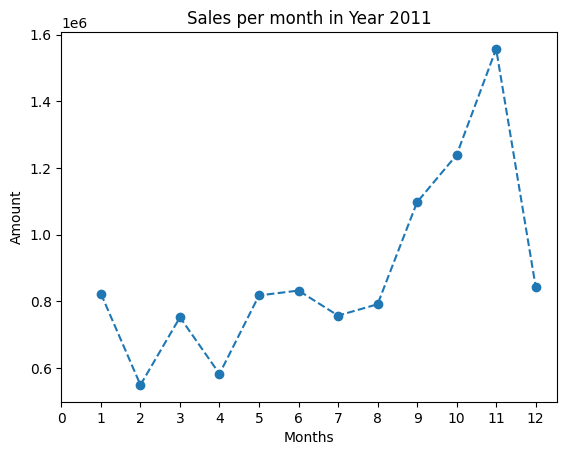

Sales started increasing from Aug and was in all time high in Nov
Month with lowest sales: 2


In [ ]:

months = df2.groupby('Month')['Amount'].sum()
print(months)
plt.plot(months.index, months.values, marker='o', linestyle='--')
plt.xticks(range(0,13))
plt.title('Sales per month in Year 2011')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.show()

print('Sales started increasing from Aug and was in all time high in Nov')
print('Month with lowest sales:', months.idxmin())

# filtered_df = df.query('Year == 2011').filter(['Month','Amount']).groupby(['Month']), as_index=False)

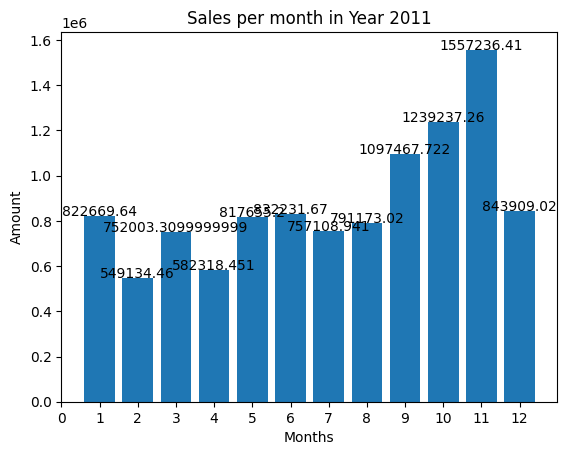

Line chart visualization provides more readability


In [35]:
# Bar chart, Bar chart better than simple plot? 
# show the value of the bar 

bars = plt.bar(months.index,months.values)
plt.xticks(range(0,13))
for bar in bars:
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), str(bar.get_height()), ha='center')
plt.title('Sales per month in Year 2011')
plt.xlabel('Months')
plt.ylabel('Amount')
plt.show()

print('Line chart visualization provides more readability')

# alternate way to iterate over bars to show the value
# for i, value in enumerate(values):
#     plt.text(i, value + 0.5, str(value), ha='center', fontsize=10)

In [19]:
months.values

array([ 822669.64 ,  549134.46 ,  752003.31 ,  582318.451,  817655.2  ,
        832231.67 ,  757108.941,  791173.02 , 1097467.722, 1239237.26 ,
       1557236.41 ,  843909.02 ])

In [49]:
# Pie chart Sales vs Month for 2011 - Countrywise, which country contributes towards highest sales?
# shadow=True, startangle=90

print(df2.columns)
country = df2.groupby('Country')['Amount'].sum()

print(country.head())
top5 = country.sort_values(ascending=False).head()
others = country.sum() - top5.sum()
print(top5)
print(others)
top5['Others'] = others
print(top5)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Amount', 'InvoiceDate', 'Day', 'Month', 'Year', 'CustomerID',
       'Country'],
      dtype='object')
Country
Australia    138904.75
Austria        9945.68
Bahrain         754.14
Belgium       39671.81
Brazil         1143.60
Name: Amount, dtype: float64
Country
United Kingdom    8997901.674
EIRE               292594.530
Netherlands        277446.660
Germany            220116.630
France             212369.060
Name: Amount, dtype: float64
641716.5499999989
Country
United Kingdom    8997901.674
EIRE               292594.530
Netherlands        277446.660
Germany            220116.630
France             212369.060
Others             641716.550
Name: Amount, dtype: float64


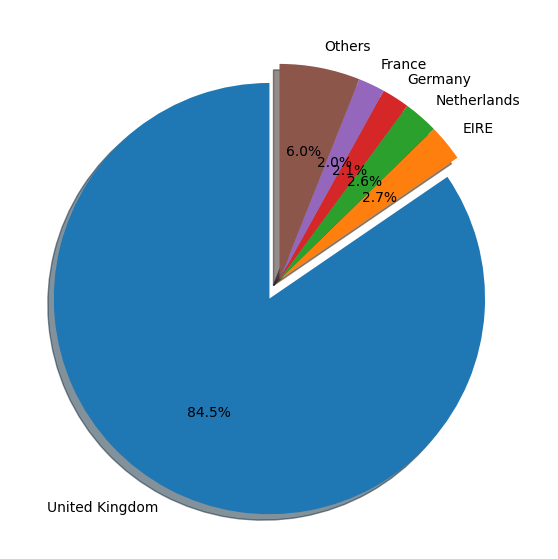

United Kingdom contributes the highest towards Sales


In [ ]:
# pie visual

explode = [0.1 if i == top5.idxmax() else 0 for i in top5.index]
plt.figure(figsize=(7,7))
plt.pie(top5.values, labels=top5.index, autopct='%1.1f%%', explode=explode, startangle=90, shadow=True) 
plt.show()

print(f'{top5.idxmax()} contributes the highest towards Sales')

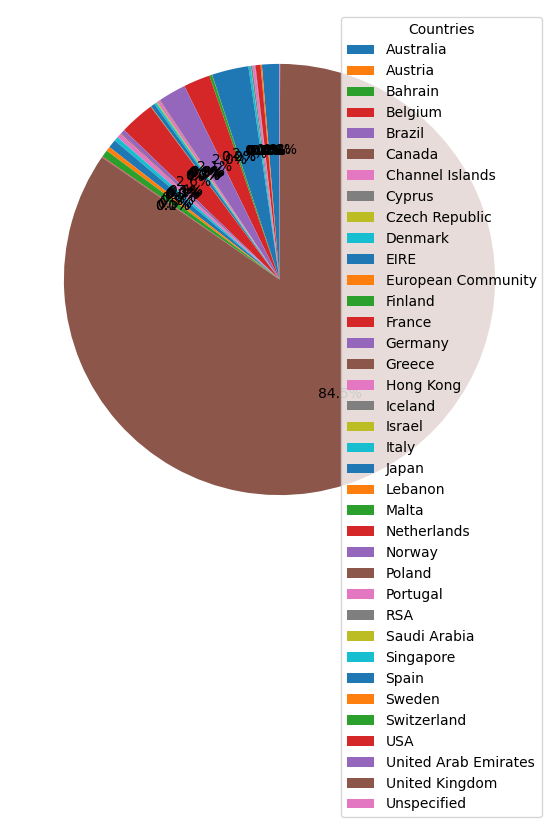

In [ ]:
# using legends - clutterred - segregating to top5 and others above

plt.figure(figsize=(7,7))
plt.pie(country.values, autopct='%1.1f%%', startangle=90) #labels=country.index para same order?
plt.legend(country.index, title='Countries', loc='best')
plt.show()

InvoiceDate
01-02-11    29636.76
01-03-11    27238.21
01-04-11    26943.24
01-05-11     6982.66
01-06-11    21000.18
              ...   
31-03-11    37667.72
31-05-11    23435.16
31-07-11    33494.86
31-08-11    34625.68
31-10-11    66246.18
Name: Amount, Length: 285, dtype: float64


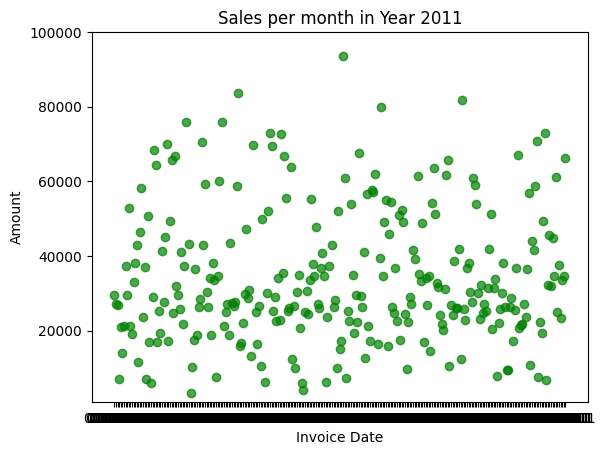

Invoice amount is mostly concentrated between 2000 and 3000


In [ ]:
# Scatter plot for invoice amount, which range has concentrated invoice amounts
# change the color of scatter points

invoice_amounts = df2.groupby('InvoiceDate')['Amount'].sum()
print(invoice_amounts)

plt.scatter(invoice_amounts.index, invoice_amounts.values, color='green', alpha=0.7)   # explore - what would it look like if x is range(len(df2))
plt.ylim(1000,100000)
plt.title('Sales per month in Year 2011')
plt.xlabel('Invoice Date')
plt.ylabel('Amount')
plt.show()

print('Invoice amount is mostly concentrated between 2000 and 3000')